In [12]:
# Parameters to set to run this notebook

# Initialize helpers.
import numpy as np
import project_path
from model.data_accessor import get_data_file_abs_path
from model.neuron_metadata import *
neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json(get_data_file_abs_path('chem.json'))
N = neuron_metadata_collection.get_size()

key_neuron = "AWAR"
key_neuron_id = neuron_metadata_collection.get_id_from_name(key_neuron)
current_nA = 6
step_duration_s = 20

# AWAR fixed points at current_nA = 3 {'9952.56': 0, '10435.27': 3, '10461.02': 5}
# At current_nA = 6 {'20893.82': 0, '19900.50': 1, '19819.50': 3}

In [13]:
from model.neural_model import NeuralModel
from util.plot_util import *
import os
import pickle

def gen_dyns(current_nA, step_duration_s, init_cond_seed):
  std_equi = None
  model = NeuralModel(neuron_metadata_collection)
  # Doesn't matter
  model.init_conds = np.zeros(N)
  model.set_I_ext_constant_currents({key_neuron: current_nA})
  model.init_kunert_2017()
  model.update_cur_I_ext_and_Vth(0)
  std_equi_V = model.Vth
  s_eq = round(model.ar / (model.ar + 2 * model.ad), 4)
  std_equi = np.append(std_equi_V, [s_eq] * N)

  np.random.seed(init_cond_seed)
  init_conds = std_equi + 10**(-4)*np.random.normal(0, 0.94, 2*N)

  model = NeuralModel(neuron_metadata_collection)
  model.init_conds = init_conds
  model.set_I_ext_constant_currents({key_neuron: current_nA})
  model.init_kunert_2017()

  simul_timesteps = int(step_duration_s / model.dt)
  (v_mat, s_mat, v_normalized_mat) = model.run(simul_timesteps)
  return v_mat

final_v_to_init_cond_i = {}
for init_cond_i in range(10): 
  print("-------------------")
  print("Iteration " + str(init_cond_i))
  v_mat = gen_dyns(current_nA, step_duration_s, init_cond_i)
  key_neuron_stable_v = v_mat[-1, key_neuron_id]

  normed_v = "%.2f" % key_neuron_stable_v
  if normed_v not in final_v_to_init_cond_i:
    print("New normed v found! %s in i = %d" % (normed_v, init_cond_i))
    final_v_to_init_cond_i[normed_v] = init_cond_i
  print("Final %s mV = %.2f" % (key_neuron, key_neuron_stable_v))
  print(final_v_to_init_cond_i)

-------------------
Iteration 0
Timestep 0 out of 2000
Timestep 100 out of 2000
Timestep 200 out of 2000
Timestep 300 out of 2000
Timestep 400 out of 2000
Timestep 500 out of 2000
Timestep 600 out of 2000
Timestep 700 out of 2000
Timestep 800 out of 2000
Timestep 900 out of 2000
Timestep 1000 out of 2000
Timestep 1100 out of 2000
Timestep 1200 out of 2000
Timestep 1300 out of 2000
Timestep 1400 out of 2000
Timestep 1500 out of 2000
Timestep 1600 out of 2000
Timestep 1700 out of 2000
Timestep 1800 out of 2000
Timestep 1900 out of 2000
Total runtime = 3.22s
New normed v found! 20893.82 in i = 0
Final AWAR mV = 20893.82
{'20893.82': 0}
-------------------
Iteration 1
Timestep 0 out of 2000
Timestep 100 out of 2000
Timestep 200 out of 2000
Timestep 300 out of 2000
Timestep 400 out of 2000
Timestep 500 out of 2000
Timestep 600 out of 2000
Timestep 700 out of 2000
Timestep 800 out of 2000
Timestep 900 out of 2000
Timestep 1000 out of 2000
Timestep 1100 out of 2000
Timestep 1200 out of 2000
T

Timestep 0 out of 2000
Timestep 100 out of 2000
Timestep 200 out of 2000
Timestep 300 out of 2000
Timestep 400 out of 2000
Timestep 500 out of 2000
Timestep 600 out of 2000
Timestep 700 out of 2000
Timestep 800 out of 2000
Timestep 900 out of 2000
Timestep 1000 out of 2000
Timestep 1100 out of 2000
Timestep 1200 out of 2000
Timestep 1300 out of 2000
Timestep 1400 out of 2000
Timestep 1500 out of 2000
Timestep 1600 out of 2000
Timestep 1700 out of 2000
Timestep 1800 out of 2000
Timestep 1900 out of 2000
Total runtime = 3.42s
Final AWAR mV = 19819.50


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


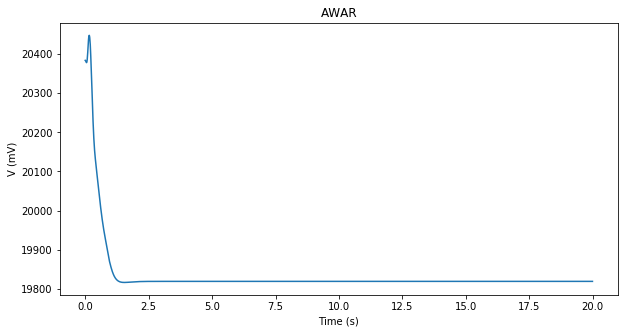

In [16]:
model = NeuralModel(neuron_metadata_collection)
model.init_kunert_2017()
v_mat = gen_dyns(
  current_nA = 6,
  step_duration_s = 20,
  init_cond_seed = 3)
key_neuron_stable_v = v_mat[-1, key_neuron_id]
print("Final %s mV = %.2f" % (key_neuron, key_neuron_stable_v))
fig = plot_potentials(
  neuron_names_to_show = [key_neuron],
  dynamics = v_mat,
  is_normalized_v = False,
  dt = model.dt,
  neuron_metadata_collection = neuron_metadata_collection)
fig.show()